Saving 6. Predict Employee Attrition.csv to 6. Predict Employee Attrition (1).csv


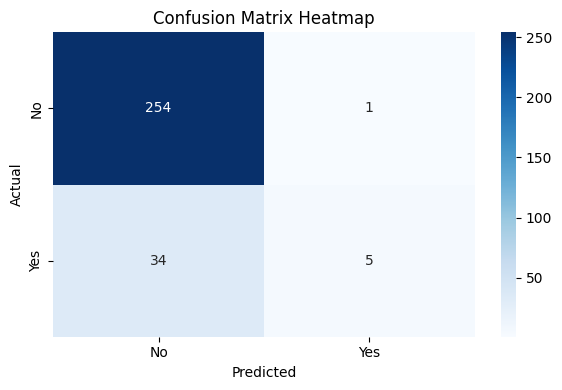

Evaluation Metrics:
Accuracy  : 0.8810
Precision : 0.8333
Recall    : 0.1282


In [2]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 📁 Step 2: Upload Dataset File
from google.colab import files
uploaded = files.upload()  # Upload '6. Predict Employee Attrition.csv'

# 📂 Step 3: Load the Dataset
df = pd.read_csv("6. Predict Employee Attrition.csv")

# 🧹 Step 4: Data Preprocessing

# Convert 'Attrition' to binary (Yes=1, No=0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Drop non-informative columns
df.drop(columns=["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"], inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 🎯 Step 5: Split Features and Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# ✂️ Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 7: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🔮 Step 8: Make Predictions
y_pred = model.predict(X_test)

# 📈 Step 9: Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# 🔥 Step 10: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

# 📋 Step 11: Print Evaluation Metrics
print("Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
